# 导入模块

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
from IPython.core.interactiveshell import InteractiveShell
import os

from snownlp import SnowNLP

mpl.rcParams["font.sans-serif"] = ["SimHei"]  # 设置表格标题中文字体
# InteractiveShell.ast_node_interactivity = "last_expr"

# 读取弹幕数据文件

In [2]:
csv_file = "./bullet/data_all.csv"
csv_data = pd.read_csv(csv_file, low_memory = False, index_col=0)  # 防止弹出警告
csv_df = pd.DataFrame(csv_data)
csv_df.head()

,uid,contentsId,contents,likeCount,tv_name
0,2017439560,1580010561365008245,看下去会被惊艳到的,8,1
1,1834316462,1582869545582003701,现在是二刷,4,1
2,1768998045,1578130987745009753,现在才发现开头是32唱片行,18,1
3,2423923372,1581029471043005559,曾之乔太美了,1,1
4,1220652758,1582344620722001918,有二刷选手吗！,5,1


# 查看数据

##  每集发送弹幕数，结合每集标题情感分析

In [3]:
user_count = csv_df.groupby("tv_name")["contents"].count().reset_index()
user_count.columns = ["集数","累计发送弹幕数"]
# print("评论用户数：{}".format( ,len(user_count))
user_count.head()


,集数,累计发送弹幕数
0,1,27522
1,2,29713
2,3,23866
3,4,30046
4,5,26785


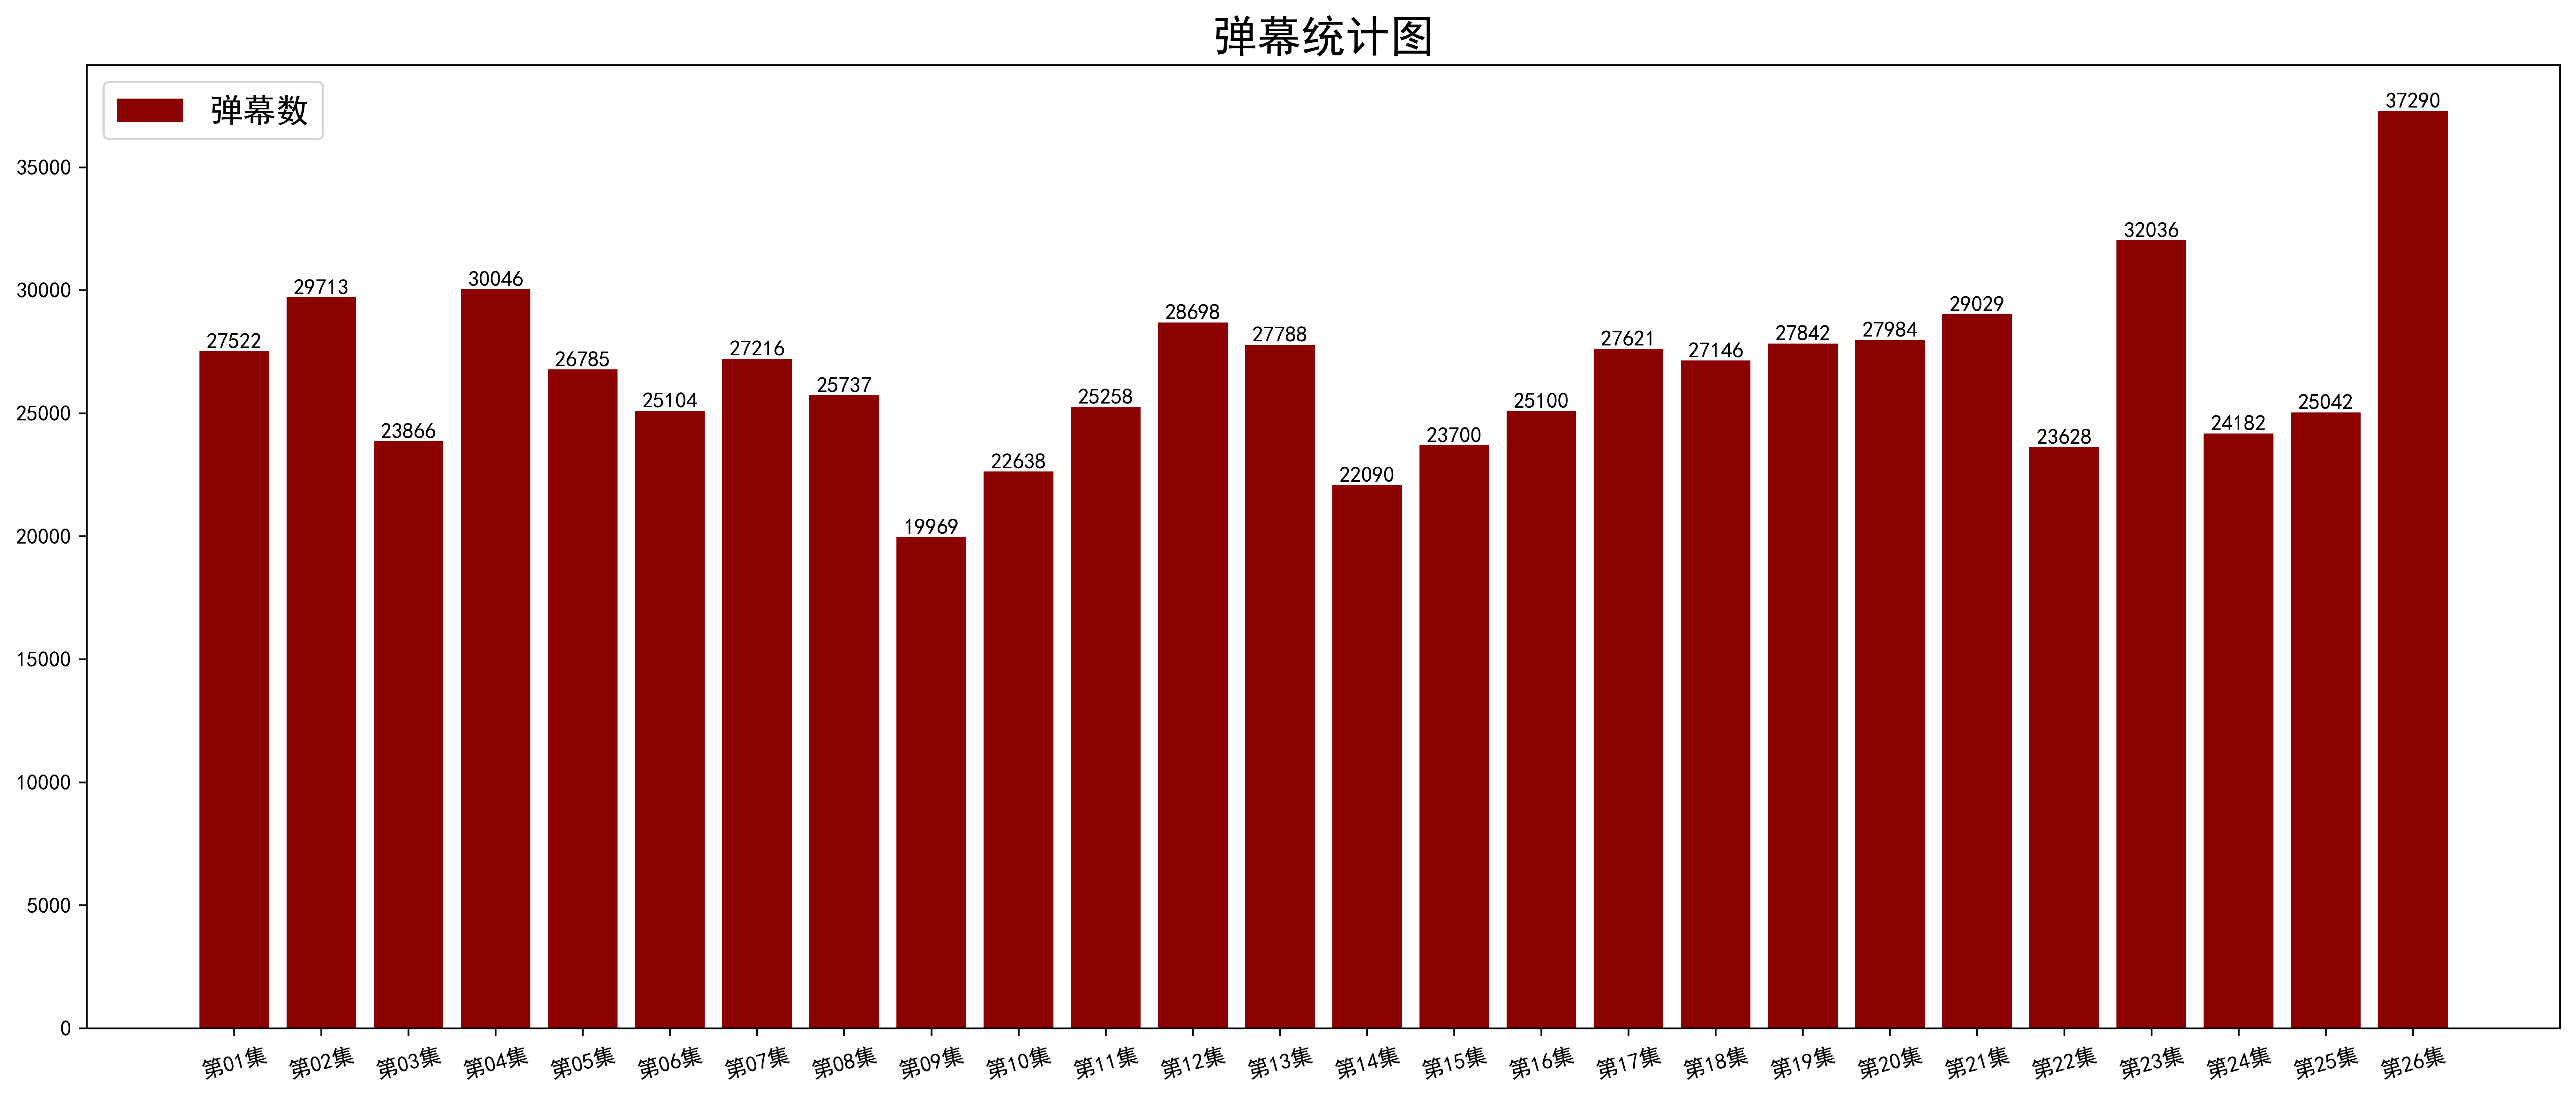

In [4]:
InteractiveShell.ast_node_interactivity = "last_expr"  # 屏蔽掉matplotlib输出的提示文字
# 创建画布
plt.figure(figsize=(20, 8), dpi=500)
# 柱状图
plt.bar(user_count.index, user_count["累计发送弹幕数"], color="darkred", label="弹幕数")
# 构造x，y轴标签
x_ticks_label = ["第{}集".format("%.2d" % (i)) for i in user_count["集数"]]
plt.xticks(user_count.index[::1], x_ticks_label[::1], rotation=15)  # 设置x轴刻度间隔、旋转角度
# plt.ylim(0, 20000)  # 设置y轴范围
#设置柱状图数字显示
for a,b in zip(user_count.index,user_count["累计发送弹幕数"]):   
    plt.text(a,b,'%d'%b,ha='center',va='bottom',fontsize=10);
plt.title("弹幕统计图", fontsize=20)
# 绘制图例
plt.legend(loc="best", fontsize=15)  # loc = "best", 0, 1, 2, 3, 4, ...

if not os.path.exists("./pictures/"):
    os.makedirs("./pictures/")
# 保存图像
plt.savefig("./pictures/bullet_hist.png")

InteractiveShell.ast_node_interactivity = "last_expr"

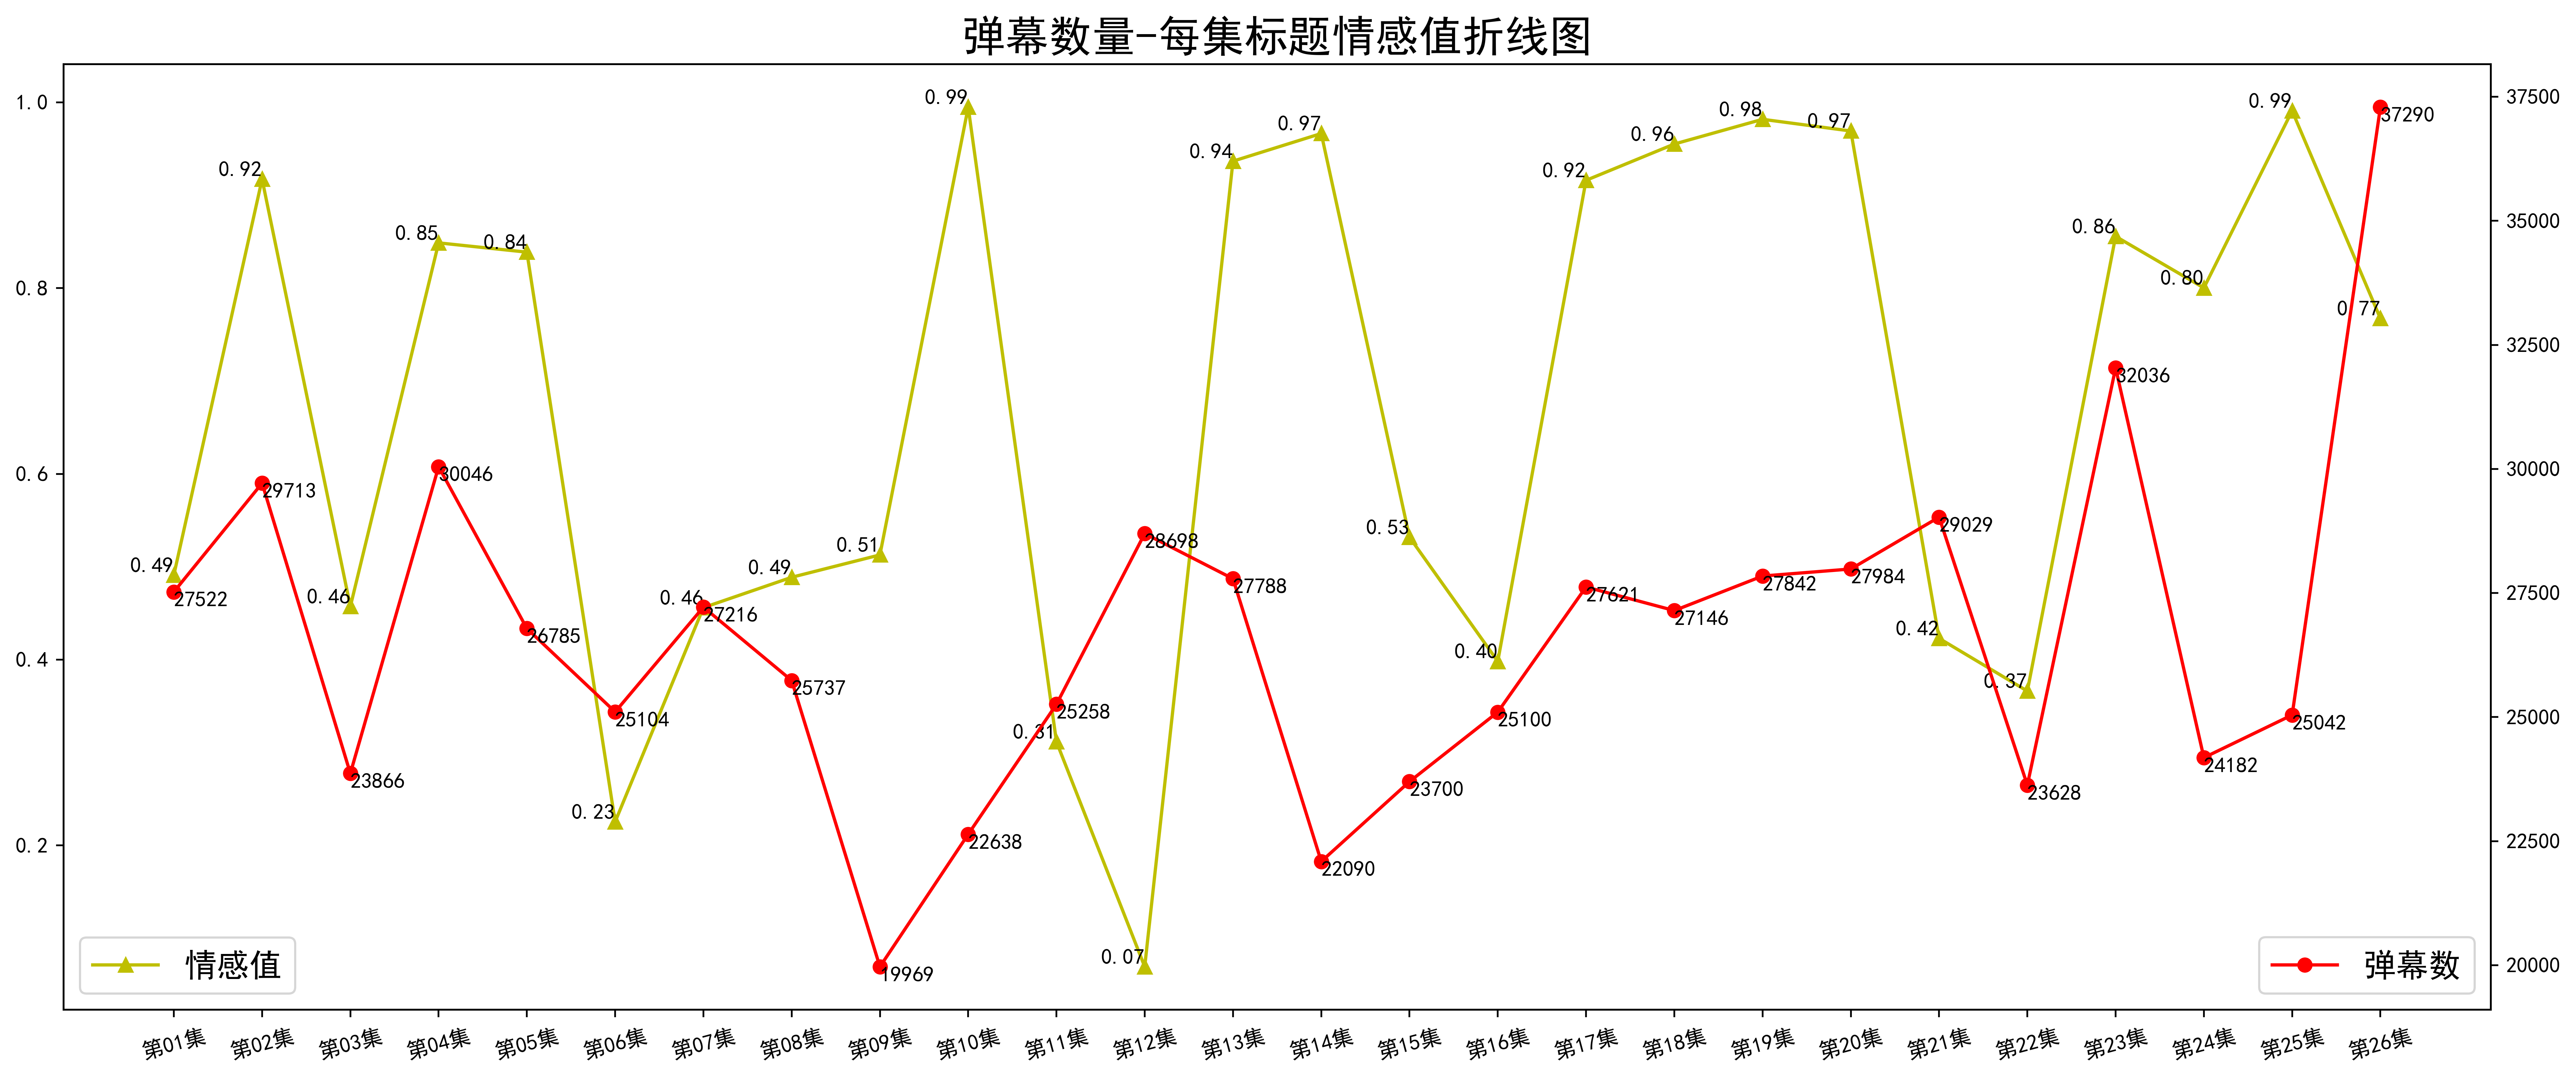

In [5]:
# 打开小标题文件
subtitle_mood = []
f1 = open(r'./bullet/subtitle.txt')
# 获取情感值
for i in f1:
    subtitle_mood.append(SnowNLP(i.strip()).sentiments)

# 情感走势
InteractiveShell.ast_node_interactivity = "last_expr"
# 创建画布
fig, axes = plt.subplots(figsize=(20, 8), dpi=500)
# 绘图
axes.plot(user_count.index, subtitle_mood, marker='^',color='y', label='情感值')
#设置折线图数字显示
for a,b in zip(user_count.index,subtitle_mood):   
    plt.text(a,b,'%.2f'%b,ha='right',va='bottom',fontsize=10);
plt.legend(loc=3, fontsize=15)
axes2 = axes.twinx()
axes2.plot(user_count.index, user_count["累计发送弹幕数"], marker='o',color='r', label='弹幕数')
#设置折线图数字显示
for a,b in zip(user_count.index,user_count["累计发送弹幕数"]):   
    plt.text(a,b,'%d'%b,ha='left',va='top',fontsize=10);
plt.legend(loc=4, fontsize=15)
# 构造x，y轴标签，标题
x_ticks_label = ["第{}集".format("%.2d" % (i)) for i in user_count["集数"]]
plt.xticks(user_count.index[::1], x_ticks_label[::1])  # 设置x轴刻度间隔
# axes.set_ylabel("情感值", fontsize=20)
# axes2.set_ylabel("弹幕数")
for xtick in axes.get_xticklabels():
    xtick.set_rotation(15)  # 旋转x轴
plt.title("弹幕数量-每集标题情感值折线图", fontsize=20)
plt.savefig("./pictures/bullet_mood.png")
InteractiveShell.ast_node_interactivity = "last_expr"

## 用户发送弹幕统计

In [6]:
users = csv_df.groupby("uid")["contents"].count().sort_values(ascending= False).reset_index()
users.columns = ["uid","弹幕条数"]
users.head()

,uid,弹幕条数
0,1403280186,460
1,2510107793,418
2,2433633230,392
3,1290065178,368
4,2260963711,356


<BarContainer object of 20 artists>


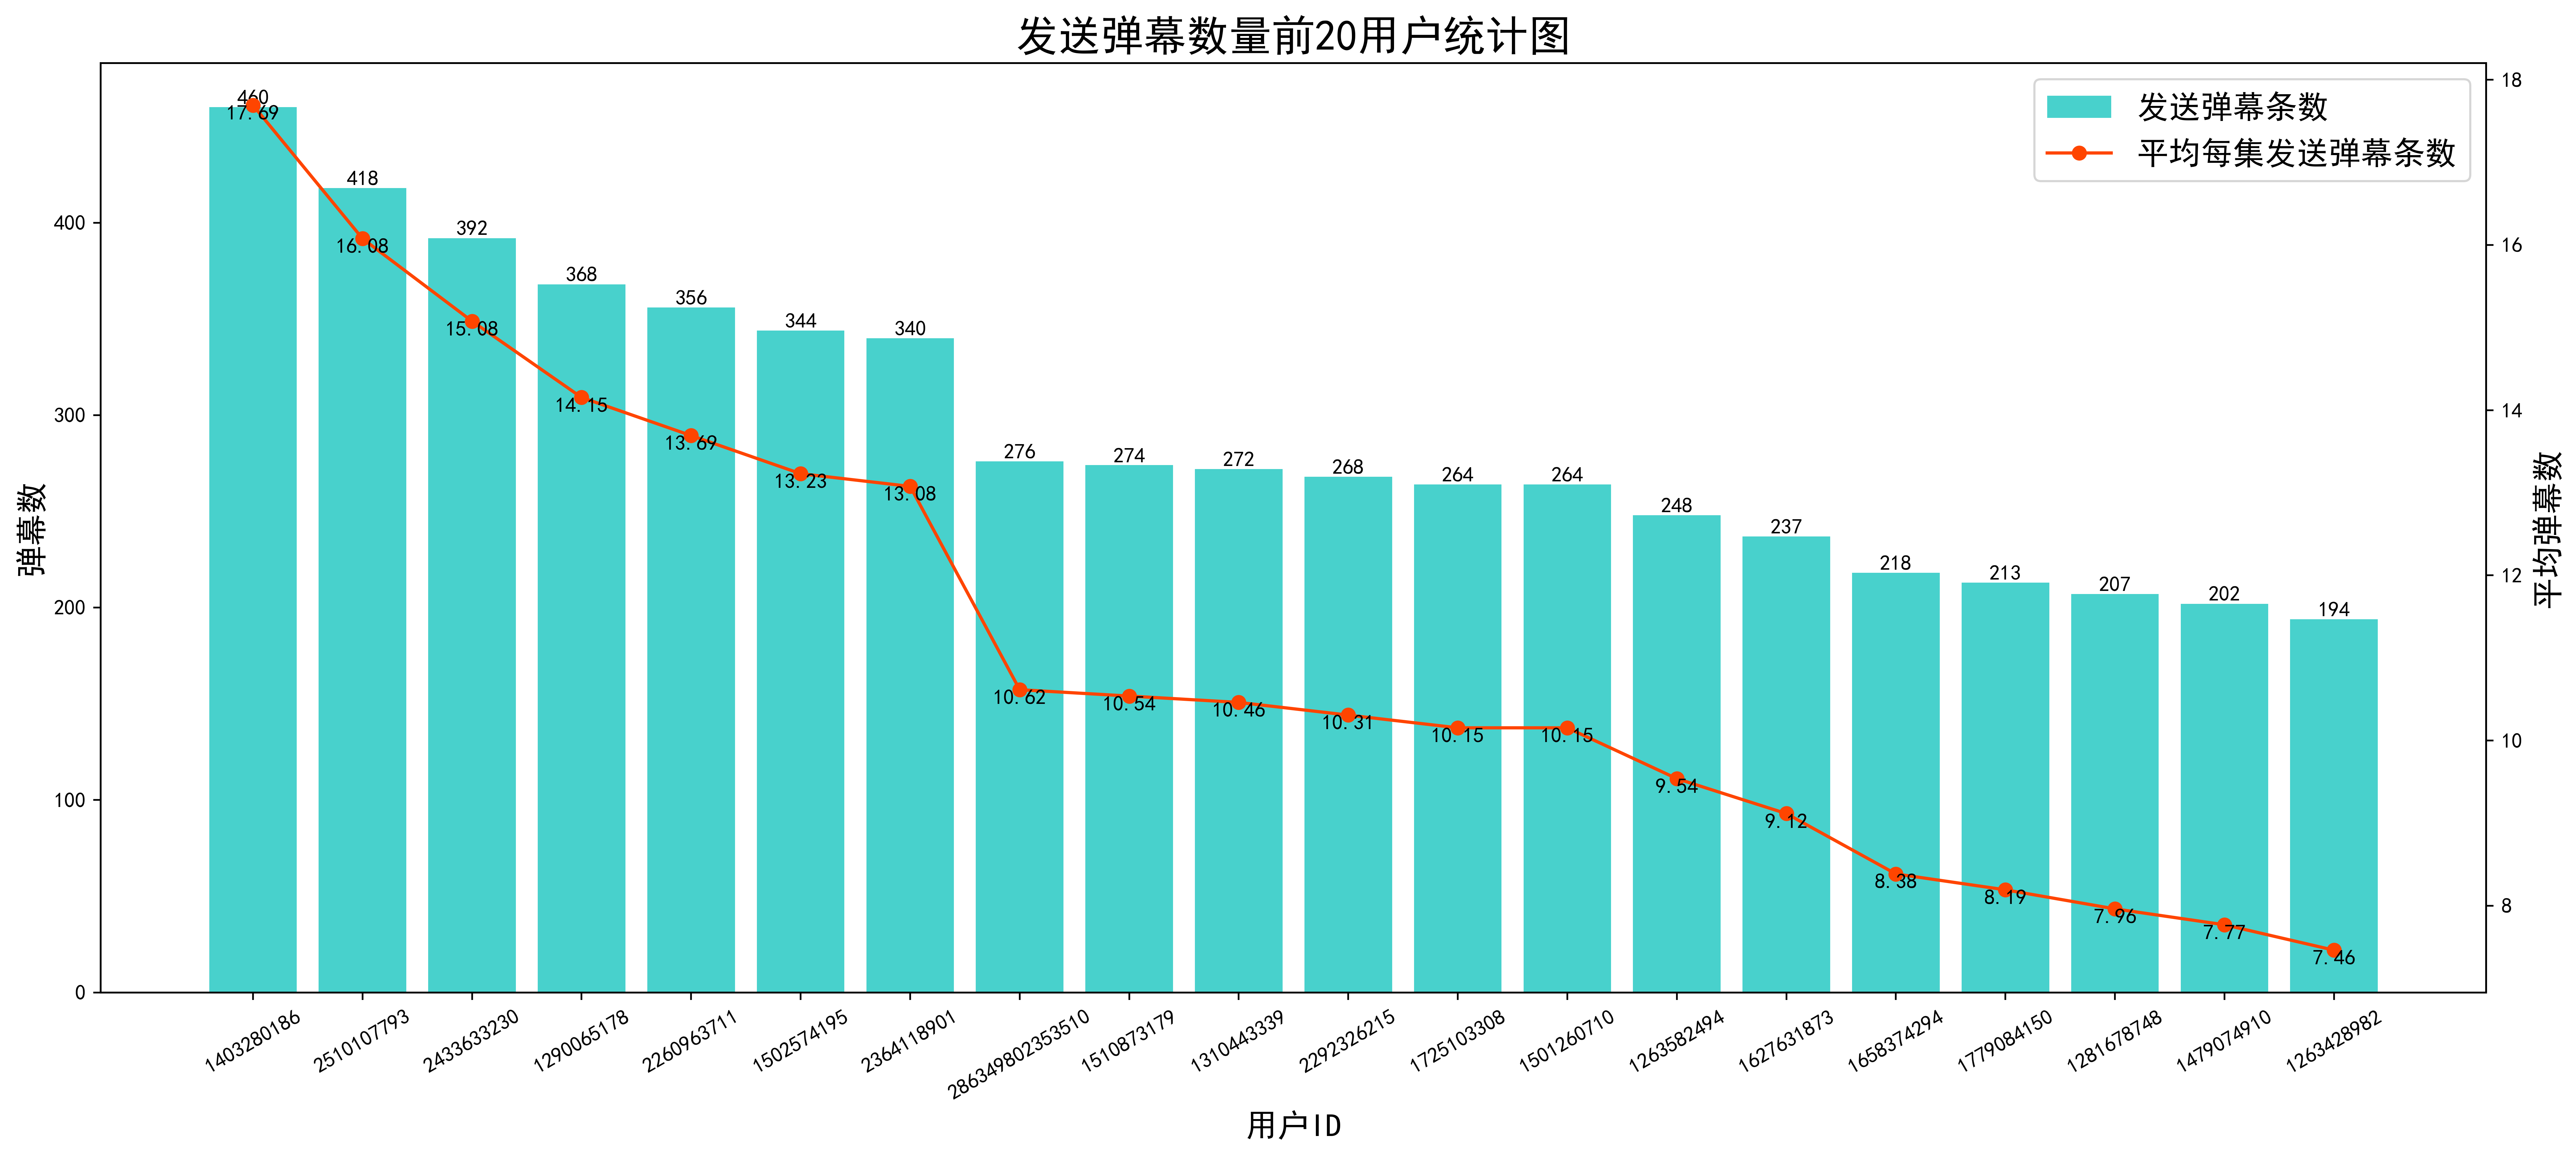

In [7]:
# 获取前20个用户绘图分析
user = users[:20][:]
# 获取用户平均每集评论数
user["平均弹幕数"] = user["弹幕条数"].map(lambda x: x/26)

InteractiveShell.ast_node_interactivity = "last_expr"
# 创建画布
fig, axes = plt.subplots(figsize=(20, 8), dpi=500)
# 绘图
line1 = axes.bar(user.index, user["弹幕条数"], label="发送弹幕条数", color="mediumturquoise")  # Color: https://www.jianshu.com/p/d0b789ba5be9
#设置柱状图数字显示
for a,b in zip(user.index,user["弹幕条数"]):   
    plt.text(a,b,'%d'%b,ha='center',va='bottom',fontsize=10);
axes2 = axes.twinx()
line2 = axes2.plot(user.index, user["平均弹幕数"], label='平均每集发送弹幕条数', marker="o", color="orangered")
#设置折线图数字显示
for a,b in zip(user.index,user["平均弹幕数"]):   
    plt.text(a,b,'%.2f'%b,ha='center',va='top',fontsize=10);
# 图例
# plt.legend()
# 构造x标签
x_ticks_label = ["{}".format("%d" % (i)) for i in user["uid"]]
plt.xticks(user.index[::1], x_ticks_label[::1])  # 设置x轴刻度间隔
# 添加描述信息
axes.set_xlabel("用户ID", fontsize=15)
axes.set_ylabel("弹幕数", fontsize=15)
axes2.set_ylabel("平均弹幕数", fontsize=15)
plt.title("发送弹幕数量前20用户统计图", fontsize=20)
# 图例
print(line1)
print(line2)
lns = [line1] + line2  # 柱状图绘图信息不是列表，故加列表括号
labs = [l.get_label() for l in lns]
axes.legend(lns, labs, loc="best", fontsize=15)
# 旋转x轴
for xtick in axes.get_xticklabels():
    xtick.set_rotation(30)  
    
plt.savefig("./pictures/users_bullets.png")
InteractiveShell.ast_node_interactivity = "last_expr"

## 受欢迎的弹幕

In [8]:
like_count = csv_df[["uid", "likeCount", "contents"]].sort_values(by="likeCount", ascending= False)
# 去重
like_count_new = like_count.drop_duplicates(subset="contents", inplace=False)
like_count_new.head(20)

,uid,likeCount,contents
205516,2174932652,11904,我带你去投海
566596,1719926599,9743,这位考生请注意，请勿弄虚作假，一经发现，开除处理
117572,1757341851,9193,我绿我自己。
588125,1471303518,9040,当然是炸掉华南海鲜市场
243275,1258435164,8859,一個眼神就知道是對方
221513,1698286644,8810,我看你，无中生有，暗度陈仓，凭空想象，凭空捏造
243059,2217975852,8674,还好有你在陈韵如旁边戳到我
224012,1014295566,8578,只有莫俊杰爱孤独黯淡的陈韵如
251514,2482603343,8442,所以之前25集白演了哈哈
191142,2073310409,8430,弟弟最先发现耶


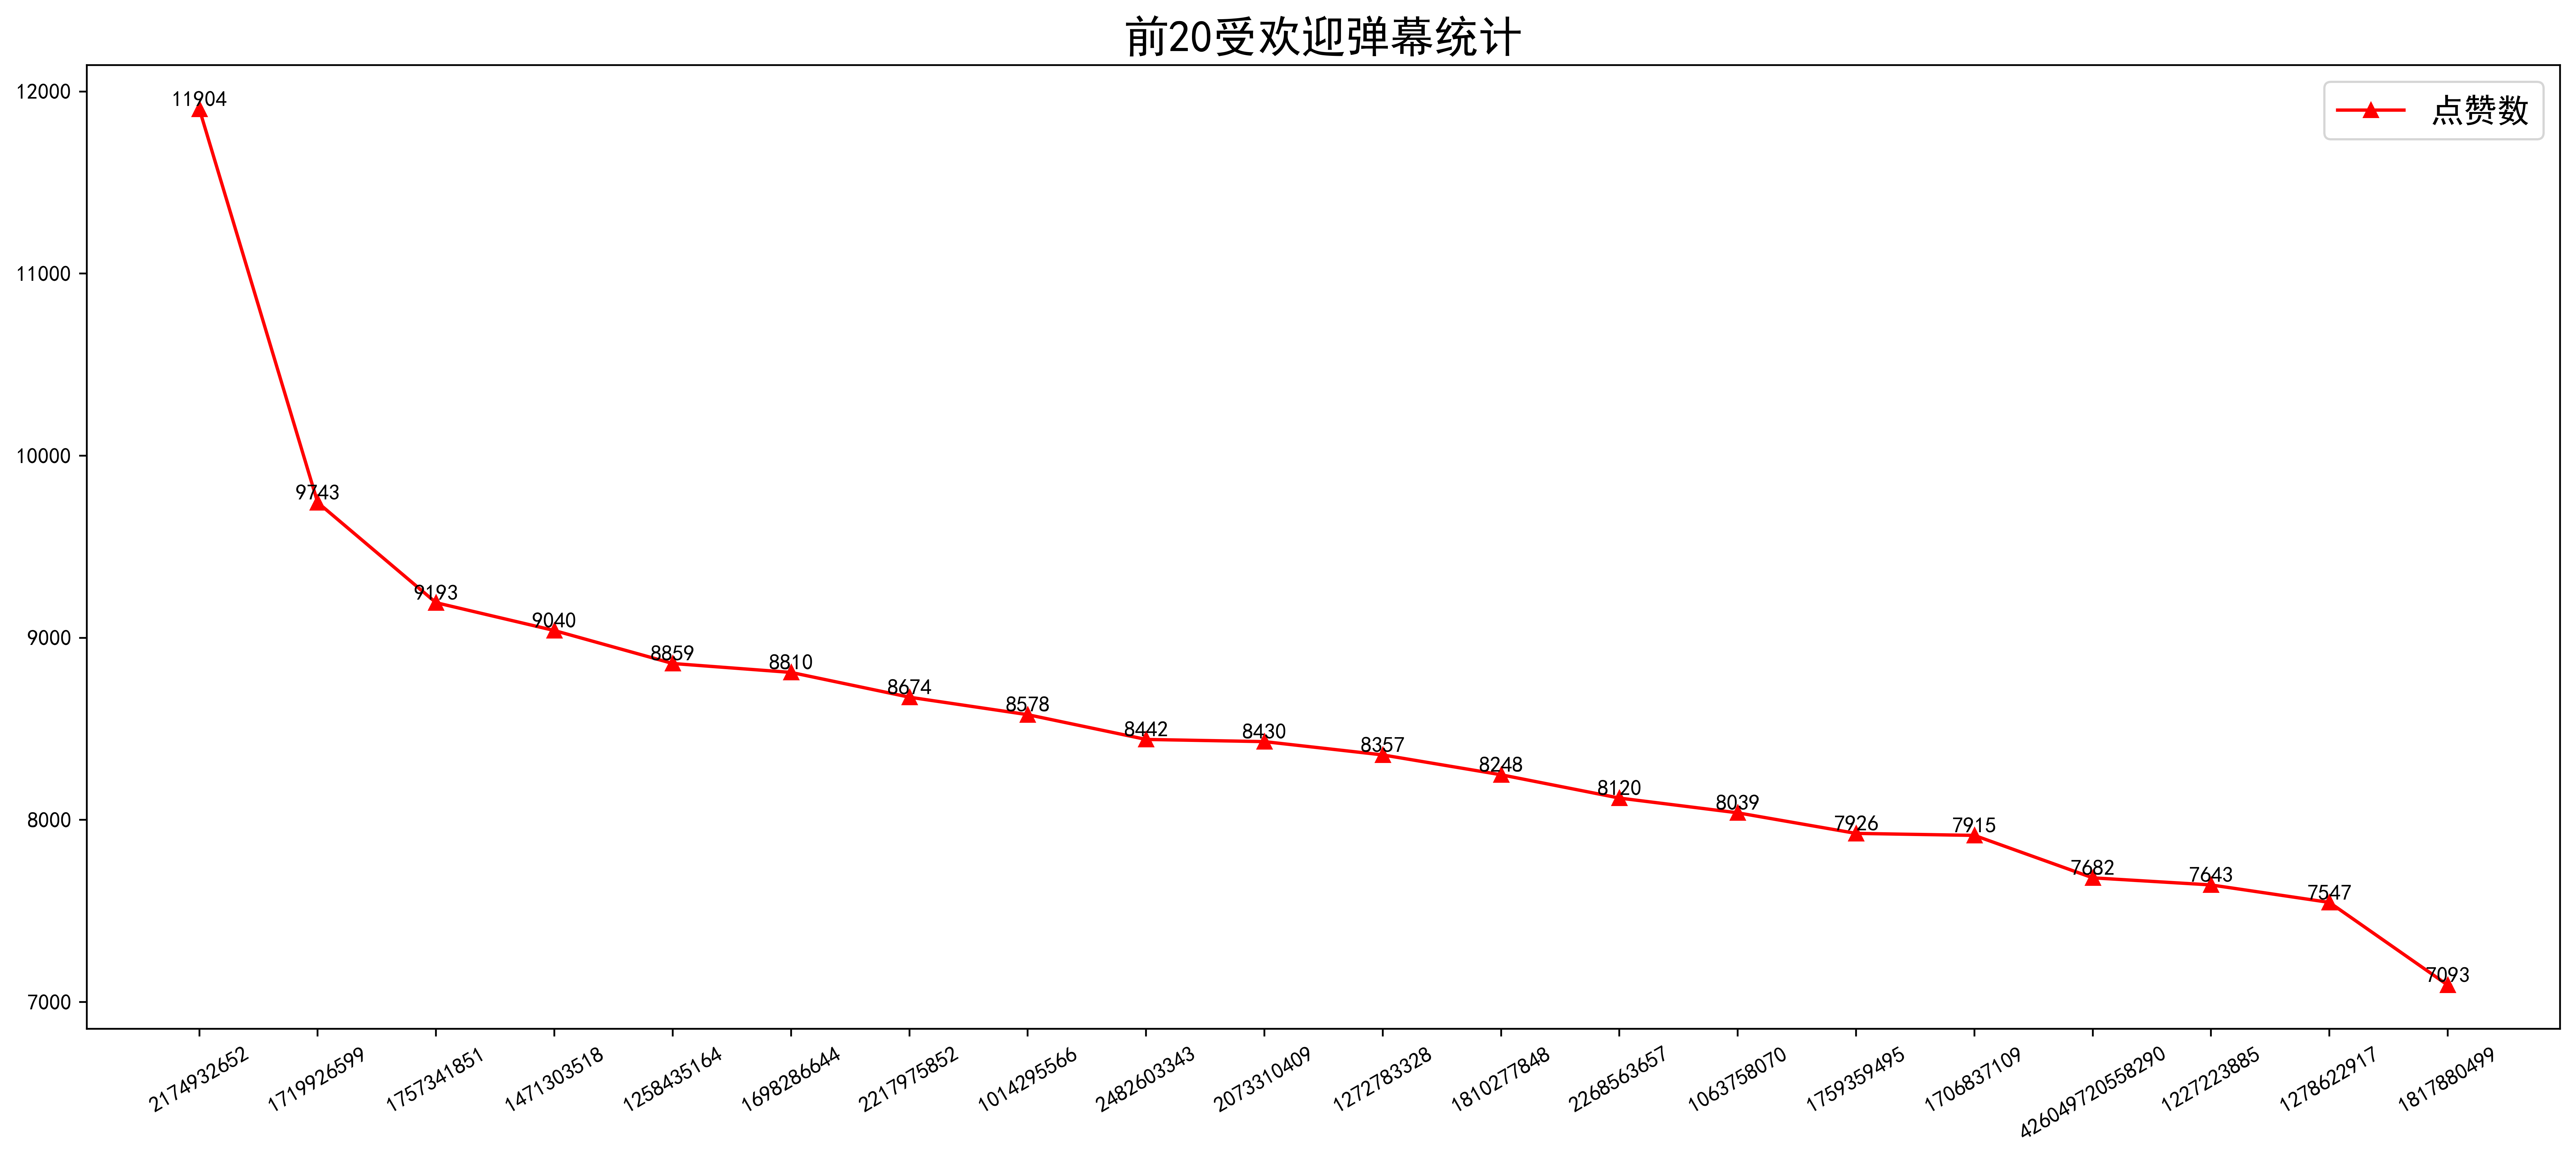

In [9]:
InteractiveShell.ast_node_interactivity = "last_expr"
# 创建画布
fig, axes = plt.subplots(figsize=(20, 8), dpi=500)
# 绘图
axes.plot(range(20), like_count_new[:20]["likeCount"], marker="^", label="点赞数", color="r")
#设置折线图数字显示
for a,b in zip(range(20),like_count_new[:20]["likeCount"]):   
    plt.text(a,b,'%d'%b,ha='center',va='bottom',fontsize=10)  # , color="darkred"
# 构造x标签
x_ticks_label = ["{}".format("%s" % (i)) for i in like_count_new[:20]["uid"]]
plt.xticks(user.index[::1], x_ticks_label[::1])  # 设置x轴刻度间隔
# 旋转x轴
for xtick in axes.get_xticklabels():
    xtick.set_rotation(30) 
# 图例
axes.legend(loc="best", fontsize=15)
# 标题
axes.set_title("前20受欢迎弹幕统计", fontsize=20)
plt.savefig("./pictures/like_count.png")

InteractiveShell.ast_node_interactivity = "last_expr"

# 词云

## 导入包

In [10]:
#coding:utf-8
import jieba    #分词包
import numpy as np    #numpy计算包
import codecs   #codecs语言代码处理包
import pandas as pd   #数据分析包
import matplotlib.pyplot as plt
from wordcloud import WordCloud#词云包

# 分词效果并不好，加入名词词典
f = open("./n_dict.txt", "w", encoding="utf-8")
f.write("黄雨萱 n\n")
f.write("陈韵如 n\n")
f.write("李子维 n\n")
f.write("王诠胜 n\n")
f.write("莫俊杰 n\n")
f.write("柯佳嬿 n\n")
f.write("许光汉 n\n")
f.write("施柏宇 n\n")
f.write("想见你 n\n")
f.write("last dance n\n")
f.close()
jieba.load_userdict("./n_dict.txt")

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\pc\AppData\Local\Temp\jieba.cache
Loading model cost 0.646 seconds.
Prefix dict has been built successfully.


## 用分词包进行切词

In [11]:
# 合并所有字符串，空格分隔
words = [i for i in like_count["contents"]]
words = "\r".join(words)

segment=[]
segs=jieba.cut(words) #切a词
for seg in segs:
    if len(seg)>1 and seg!='\r\n':
        segment.append(seg)
        
# 合并人名
for index in range(len(segment)):
    if len(segment[index]) == 1:
        continue
    elif segment[index]=="雨轩" or segment[index]=="雨萱" or segment[index]=="黄宇轩" \
        or segment[index]=="宇轩" or segment[index]=="黄雨瑄" or segment[index]=="雨瑄":
        segment[index]="黄雨萱"
    elif segment[index]=="韵如" or segment[index]=="韵茹" or segment[index]=="陈芸如":
        segment[index]="陈韵如"
    elif segment[index]=="李子薇" or segment[index]=="李紫薇" or segment[index]=="李子伟" \
        or segment[index]=="紫薇" or segment[index]=="子薇" or segment[index]=="子维" or segment[index]=="李子":
        segment[index]="李子维"
    elif segment[index]=="王全胜" or segment[index]=="全胜" or segment[index]=="王诠生" \
        or segment[index]=="诠胜":
        segment[index]="王诠胜"
    elif segment[index]=="俊杰":
        segment[index]="莫俊杰"
    elif segment[index]=="许关汉" or segment[index]=="許光漢":
        segment[index]="许光汉"

## 去停用词

In [12]:
words_df=pd.DataFrame({'segment':segment})
words_df.head()
stopwords=pd.read_csv("..\Wechat\original_data\stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'],encoding="utf-8")
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]

## 统计频率并排序

In [13]:
words_stat = words_df.groupby('segment').agg(计数=pd.NamedAgg(column='segment', aggfunc='size')).reset_index().sort_values(
    by='计数', ascending=False)
words_stat.head(20)  #打印统计结果

,segment,计数
27260,李子维,60105
47143,陈韵如,37104
39299,莫俊杰,33991
13257,喜欢,29820
34938,真的,23180
49449,黄雨萱,18978
32854,王诠胜,16589
19830,弟弟,15519
35883,穿越,14426
6490,保护,14089


In [14]:
# from scipy.misc import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator, STOPWORDS
%matplotlib 
# bimg=imread('tuoyuan.jpg')
wordcloud=WordCloud(background_color='white',
               max_words=900,
               stopwords=STOPWORDS,
               font_path='msyh.ttc',  # 设置字体格式
               max_font_size=700,  # 设置字体最大值
               random_state=100,  # 设置有多少种随机生成状态，即有多少种配色方案
               width=1000,  # 生成图片的大小
               height=800,)
#wordcloud=wordcloud.fit_words(words_stat.head(4000).itertuples(index=False))
words = words_stat.set_index("segment").to_dict()
wordcloud=wordcloud.fit_words(words["计数"])
# bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor())
plt.show()
plt.savefig("./pictures/wordcloud.png")

Using matplotlib backend: Qt5Agg
